In [107]:
import numpy as np
import pandas as pd
from scipy import stats
df =pd.read_csv("C:/Users/al6436/Downloads/vs.csv")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr

<bound method DataFrame.corr of        Index  Customer ID  Age  Qty  Amount  ship-postal-code
0          1      1029312   44    1     376            140301
1          2      2183842   29    1    1449            122002
2          3      1641533   67    1     453            700029
3          4      7490807   20    1     729            613007
4          5      9293516   62    1     544            122001
...      ...          ...  ...  ...     ...               ...
31042  31043      4724097   60    1     565            412307
31043  31044      4724097   34    1     939            560061
31044  31045      3572295   29    1    1115            262501
31045  31046      1423498   46    1     399            424006
31046  31047      4694875   36    1     791            506001

[31047 rows x 6 columns]>

In [108]:
cross_tab=pd.crosstab(index=df['Gender'],columns=df['Month'])
print(cross_tab)

Month    Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct   Sep
Gender                                                                        
Men      849   852   736   846   879   806   810   729   737   753   747   750
Women   1836  1765  1648  1904  1823  1773  1787  2090  1880  1630  1677  1740


In [109]:
cross_tab=pd.crosstab(index=df['Month'],columns=df['Qty'])
print(cross_tab)

Qty       1   2  3  4  5
Month                   
Apr    2671  10  3  1  0
Aug    2607   9  0  1  0
Dec    2378   6  0  0  0
Feb    2732  16  2  0  0
Jan    2690   9  3  0  0
Jul    2569   8  1  1  0
Jun    2584  11  2  0  0
Mar    2799  17  2  1  0
May    2597  17  2  1  0
Nov    2374   7  1  1  0
Oct    2413  10  1  0  0
Sep    2477  10  2  0  1


In [110]:
chi_sq_result = stats.chi2_contingency(cross_tab,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")


The p-value is 0.8246891455663429 and hence we accept the null Hpothesis with 44 degrees of freedom


In [111]:
corr,p_value = stats.pearsonr(df['Qty'],df['Amount'])
print("Pearson Correlation :",corr)
print("p_value :",p_value)

Pearson Correlation : 0.17237736591040181
p_value : 1.177368828787058e-205


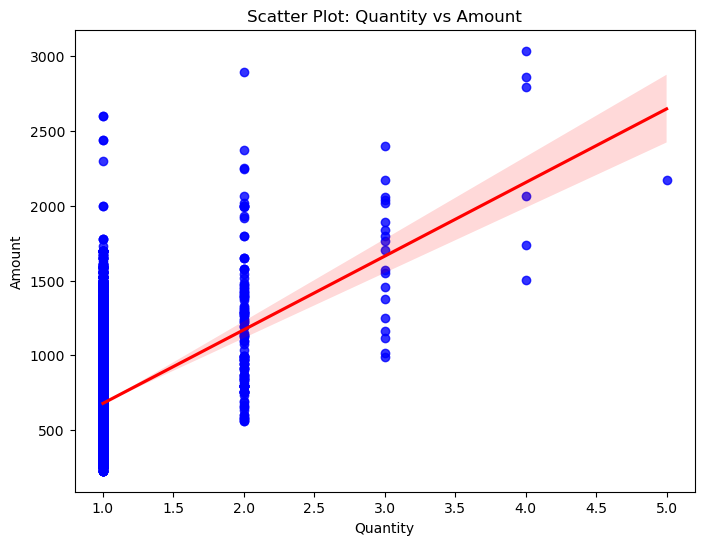

In [112]:
plt.figure(figsize=(8,6))
sns.regplot(x='Qty', y='Amount', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Quantity vs Amount')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.show()

In [113]:
corr, p_value = stats.spearmanr(df['Qty'], df['Amount'])
print("Spearmen Correlation :",corr)
print("p_value :",p_value)

Spearmen Correlation : 0.091221460245887
p_value : 2.303765007265956e-58
